#Atividade 2

##Informações sobre o dataset
O dataset escolhido foi o ['Algerian Forest Fires'](https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++). Neste dataset, temos 244 instâncias de duas regiões do norte da Algéria, sendo 122 de cada. Neste trabalho, serão analisados os dados da [região de Bejaia](https://drive.google.com/file/d/11sn_kurS6iJlbA13iSa4ztbBVmzrfMFr/view?usp=sharing). Os dados foram tomados de junho de 2012 a setembro de 2012. São 11 atributos e um valor de saída, nomeados da seguinte forma:
1. Date: (DD/MM/YYYY) Dia, mês e ano.

Observações climáticas:
2. Temp : Temperatura máxima em Celsius: de 22 a 42
3. RH : Umidade relativa em %: 21 a 90
4. Ws : Velocidade do vento em km/h: 6 a 29
5. Rain: total diário em mm: 0 a 16.8 

Componentes FWI(Índice de Risco de Incêndio)
6. Umidade do combustível fino(FFMC) índice do sistema FWI: 28.6 a 92.5
7. Umidade de matéria orgânica(DMC) índice do sistema FWI: 1.1 a 65.9
8. Nível de seca(DC) índice do sistema FWI: 7 a 220.4
9. Índice de propagação inicial(ISI) índice do sistema FWI: 0 a 18.5
10. Índice de acúmulo(BUI) índice do sistema FWI: 1.1 a 68
11. Índice de clima para fogo(FWI) Índice: 0 to 31.1
12. Classes: duas classes, chamadas 'Fire' e 'not Fire'

##Importando as bibliotecas e o dataset

In [ ]:
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn import metrics
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.cluster import KMeans


In [ ]:
import io
from google.colab import files
uploaded = files.upload()
algfires_df = pd.read_csv(io.BytesIO(uploaded['algerian_fires.csv']))


##Parte 1
###A)
* Selecionando as colunas para aplicar o Naive-Bayes.

In [ ]:
df = algfires_df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']]
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...
117,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire
118,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire


* Determinando os eixos para fazer a predição.



In [ ]:
x = df.drop('Classes', axis=1)
y = df['Classes']

* Modelo com teste de 1/3 e treino de 2/3

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

gaussModel = GaussianNB()
gaussModel.fit(x_train, y_train)

y_pred = gaussModel.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_pred)*100
accuracy

97.5609756097561

* Modelo com teste de 1/4 e treino de 3/4

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.25)

gaussModel = GaussianNB()
gaussModel.fit(x_train2, y_train2)

y_pred2 = gaussModel.predict(x_test2)

accuracy2 = metrics.accuracy_score(y_test2, y_pred2)*100
accuracy2

93.54838709677419

###B)
Utilizando a técnica de validação cruzada

In [ ]:
for kfold in range(5,10):
  result = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)
  scores = cross_val_score(result, x , y, cv=kfold)
  print(scores)

[1.   1.   0.85 0.9  1.  ]
[1.         1.         1.         0.94117647 0.875      1.        ]
[1.         1.         1.         0.92857143 1.         0.85714286
 1.        ]
[1.         1.         1.         1.         0.91666667 0.91666667
 0.91666667 1.        ]
[1.         1.         1.         1.         1.         0.90909091
 0.90909091 0.90909091 1.        ]


###C)
Repetir a e b com proporção entre as classes

* Mantendo 50 de cada classe para refazer os testes

In [ ]:
class_df = df.groupby('Classes')

df_part1 = class_df.get_group('fire')
df_part2 = class_df.get_group('not fire')

df2 = df_part1.iloc[0:50]
df2 = df2.append(df_part2.iloc[0:50])
df2

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire
10,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,fire
11,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,fire
...,...,...,...,...,...,...,...,...,...,...,...
98,31,71,17,0.3,69.6,3.2,30.1,1.5,5.1,0.6,not fire
99,30,73,17,0.9,62.0,2.6,8.4,1.1,3.0,0.4,not fire
100,30,77,15,1.0,56.1,2.1,8.4,0.7,2.6,0.2,not fire
101,33,73,12,1.8,59.9,2.2,8.9,0.7,2.7,0.3,not fire


* Repetindo o experimento a com 1/3 e 2/3.

In [ ]:
x = df2.drop('Classes', axis=1)
y = df2['Classes']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

gaussModel = GaussianNB()
gaussModel.fit(x_train, y_train)

y_pred = gaussModel.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_pred)*100
accuracy

90.9090909090909

* Repetindo o experimento a com 1/4 e 3/4

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.25)

gaussModel = GaussianNB()
gaussModel.fit(x_train2, y_train2)

y_pred2 = gaussModel.predict(x_test2)

accuracy2 = metrics.accuracy_score(y_test2, y_pred2)*100
accuracy2

92.0

* Repetindo o experimento b com k ainda entre 5 e 10

In [ ]:
for kfold in range(5,10):
  result = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)
  scores = cross_val_score(result, x , y, cv=kfold)
  print(scores)

[1.   1.   0.85 0.9  1.  ]
[1.         1.         1.         0.94117647 0.875      1.        ]
[1.         1.         1.         0.92857143 1.         0.85714286
 1.        ]
[1.         1.         1.         1.         0.91666667 0.91666667
 0.91666667 1.        ]
[1.         1.         1.         1.         1.         0.90909091
 0.90909091 0.90909091 1.        ]


<br><br>
##Parte 2
* Aplicando a técnica de Árvore de decisão ao dataframe 1 e plotando a árvore resultante.

[Text(133.92000000000002, 190.26, 'FFMC <= 80.15\ngini = 0.494\nsamples = 81\nvalue = [36, 45]\nclass = not fire'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 44\nvalue = [0, 44]\nclass = not fire'),
 Text(200.88000000000002, 135.9, 'FWI <= 3.5\ngini = 0.053\nsamples = 37\nvalue = [36, 1]\nclass = fire'),
 Text(133.92000000000002, 81.53999999999999, 'ISI <= 2.9\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = fire'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = fire'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = not fire'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]\nclass = fire')]

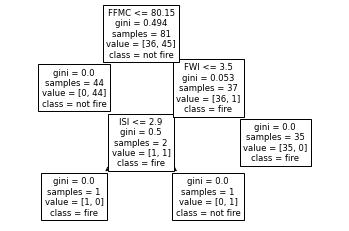

In [ ]:
x = df.drop('Classes', axis=1)
y = df['Classes']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

decisionTreeModel = tree.DecisionTreeClassifier() #gini é o critério padrão
decisionTreeModel.fit(x_train, y_train)

labels = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']
classes = ['fire', 'not fire']

tree.plot_tree(decisionTreeModel, class_names=classes, feature_names=labels)


<br><br>
##Parte 3
* Aplicando KMEANS e plotando o gráfico.

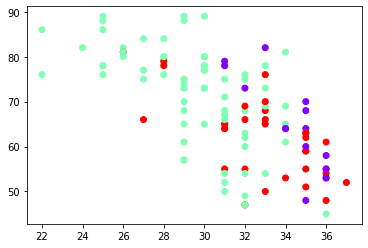

In [ ]:
x = df.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values

kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_
kmeans.labels_

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, cmap='rainbow')

